## 군집합 분석 -> k-평균 알고리짐(군집합)분석
### 샘플 데이터 : 온라인 판매 데이터(영국 특정 쇼핑몰의 샘플 데이터 기반)
### UCI 레포지토리 다운 받을 예정. 
### 분석 모델 구축 : 사이킷런의 내부에 있는 패키지를 이용하고 있는 중. 
### 구글, 메타, 파이썬의 내장 패키지등, 오픈 소스를 이용하고 있다. 

### 용어정리 
### 비지도 학습: 쉽게 말해서, 답이 없는 학습을 시켜서, 학습된 모델을 이용해서, 예측값 , 실제값 비교하는 
### 간단한 프로세스 
### x(훈련데이터)-> 머신러닝 프로그램 -> 학습 모델 -> 클러스터(군, 집합, 분류..)
###  새로운 데이터 -> 학습 모델 -> 예측 레이블(타겟, 결과등)

### 예) 쇼핑몰 , 소비 패턴을 파악하는 비지도학습 모델링. 
### 예2) 겨울에 1월 시즌에는 어는 물품이 많이 구매가 되었는지, 연령층 별로, 구매 패턴-> 분류를 
### 예3) 30 ~ 40대, 책 구매를 많이했고, 식료품에 다이어트 식품들이 구매가 많이 되었다. -> 광고,  

### k-평균 알고리즘 
### k개의 클러스터를 구성한다. k개의 중심점을 임의의 위치로 잡고 중심점을 기준으로 가까이 있는 데이터를
### 확인한 뒤, 그들과의 거리의 평균 지점을 중심점으로 이동한다. -> 나중에, 삼각형 모양으로 중심점 표기.
### 임의의 클러스터의 k개의 최적 갯수를 찾는 부분이 문제점
### 가장 좋은 k를 찾기 위한 방법으로, 엘보 방법, 실루엣 방법을 사용할 예정. 

### 엘보 방법. 
### 클러스터의 중심점과 클러스터 내의 데이터 거리 차이의 제곱값 합을 -> 왜곡이라고 부름 
### 선이 급격히 꺽이는 지점 있음. 그 지점 엘보(팔꿈치), 값을 최적의 k 값으로 사용함 -> 그래프로 꺽이는 지점, 보여드림. 

### 실루엣 분석
### 클러스터의 갯수를 얼마로 정할지를 지정해주는 분석 방법.
### 클러스터 내에 있는 데이터가 얼마나 조밀하게 모여 있는지를 측정하는 도구. 
### 데이터 i가 해당 클러스터(군, 집합)내의 데이터와 얼마나 가까운지를 나타내는 응집력 a(i)
### 가장 가까운 다른 클러스터 내의 데이터와 얼마나 떨어져 있는지 (분리도) b(i)
### 실루엣 계수 s(i)-> = (b(i) - a(i)) / max (a(i), b(i)) , 
### 실루엣 계수의 결괏값은 , -1 < s(i) <1, 결론, -> 1에 가까울수록 좋은 군집화. 


### 사이킷런에서, 함수로 다 제공해주니, 이용하기.



### 샘플 데이터 받기
### UCI 레포지토리에서 -> online retail 


In [1]:
import df
# 엑셀 파일 읽기 도구 설치.
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd 
import math

# 영국 온라인 소매 플랫폼, 2010/12/1 , 2011/12/9 , 1년 동안 수집된 데이터. 
retail_df = pd.read_excel("./Online_Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Online_Retail.xlsx , 컬럼 기본 정보 
### InvoiceNo : 6자리 정소, 송장번호, C로 시작하는 것은 취소 주문 
### StockCode : 제퓸 고유 품목 코드 
### Description : 제품 설명 
### Quantity : 주문 수량 
### InvoiceDate : 주문 날짜 시간 
### UnitPrice : 제품 단가(영국 파운드화)
### CustomerID : 주문 고객 번호 
### Country : 주문 고객 국적

In [3]:
# 데이터 기본 정보를 확인. 
retail_df.info()
# 전체 데이터 갯수 : 541,909 개 
# Description :     540,455 개
# CustomerID  :     406,829 개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# 데이터 기본 정제
# 1 CustomerID 기존 : 실수형 -> 정수형 변경 
# 2 CustomerID 없는 데이터 제거 
# 3 Quantity, UnitPrice , 음수값 제거, 수량, 가격은 기본적으로 다 양이라서, 

# Quantity, UnitPrice , 음수값 제거,
retail_df = retail_df[retail_df["Quantity"]>0]
retail_df = retail_df[retail_df["UnitPrice"]>0]
# 2 CustomerID 없는 데이터 제거 
retail_df = retail_df[retail_df["CustomerID"].notnull()]

# 1 CustomerID 기존 : 실수형 -> 정수형 변경 
retail_df["CustomerID"] = retail_df["CustomerID"].astype(int)

# 확인, 
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [5]:
# 기본 null 값 여부 확인. null 값 모두 제거 확인. 
print(retail_df.isnull().sum())
# 차원으로 해당 데이터의 갯수 
print(retail_df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(397884, 8)


In [6]:
# 중복 데이터, 레코드  제거
# inplace=True : 원본 데이터도 변경에 영향을 받겠다. 
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(392692, 8)


In [7]:
# 총 컬럼 8개 중에서, 필요한 컬럼만 가져오기
# 제품수, 거래 건수, 고객수 
# 수량 파악해보기. 
pd.DataFrame([
  {"Product":len(retail_df["StockCode"].value_counts()),
  "Transaction": len(retail_df["InvoiceNo"].value_counts()),
  "Customer": len(retail_df["CustomerID"].value_counts())}],
  columns = ["Product","Transaction","Customer"],
  index= ["counts"]
)


,Product,Transaction,Customer
counts,3665,18532,4338


In [8]:
# 국적 수량 파악
retail_df["Country"].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [9]:
# 마케팅 분석 이용하기 위해서, 몇가지 데이터 더 추출하기. 
# 1 고객의 주문 횟수,
# 2 주문 총액 
# 3 마지막 주문 후 며칠이 지났는지 정보. 

# 새 컬럼 -> 주문 금액 추가하기. 주문 단가 * 주문 수량 = 총 주문 금액 
retail_df["SalesAmount"] = retail_df["UnitPrice"] * retail_df["Quantity"]

# 확인. 
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [10]:
# 집계 
# 송장 번호, 총 주문 금액, 주문 날짜를 , 집계 기준으로 사용.

# 송장 번호, 총 주문 금액, 주문 날짜를-> 하나의 딕션너리에 담아두기. 

aggregations = {
  "InvoiceNo": "count",
  "SalesAmount" : "sum",
  "InvoiceDate" : "max"
}

# CustomerID(구매자)를 기준으로 그룹을 나누고, 
# 위에 aggregations 이 기준으로 집계를 할 예정. 
customer_df = retail_df.groupby("CustomerID").agg(aggregations)
customer_df= customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SalesAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [11]:
# 새컬럼 추가, Freq, ElapsedDays 추가. 
customer_df= customer_df.rename(columns={"InvoiceNo":"Freq", "InvoiceDate":"ElapsedDays"})
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [12]:
# 마지막 주문일로 부터 얼마나 시간이 지났는지 여부를 확인.
# 기준 날짜는 임의로 : 2011년 12월 10일 
# 기준 날짜 - 마지막 구매일 : 일수로 계산.

import datetime

# 기준 날짜 - 마지막 구매일 : 일수로 계산해서, 새 컬럼에 추가. 
customer_df["ElapsedDays"]= datetime.datetime(2011,12,10) - customer_df["ElapsedDays"]
customer_df.head()


,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [13]:
# 일수의 타입을 datetime -> 정수로 (일수)로 변경해서, 
# 모델 학습 준비물 작업. 
customer_df["ElapsedDays"]= customer_df["ElapsedDays"].apply(lambda x:x.days +1)
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


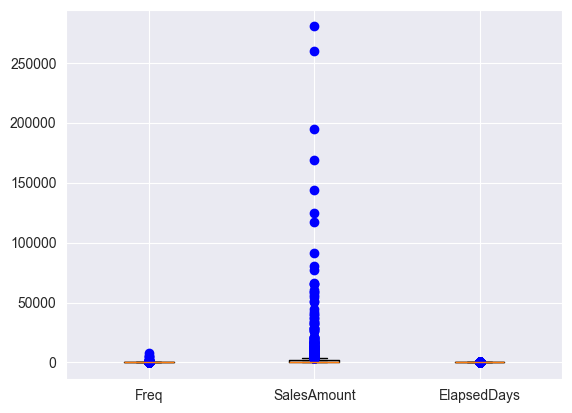

In [14]:
# 기본 데이터 통해서, 데이터 분포도를 1차 검사
# 박스 플롯 그림으로 , 조사. 
# 데이터가 특정 부분에 치우처 진 정도를 알아보기. 
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, ax = plt.subplots()
ax.boxplot([customer_df["Freq"], customer_df["SalesAmount"], customer_df["ElapsedDays"]],sym="bo")
plt.xticks([1,2,3], ["Freq", "SalesAmount","ElapsedDays"])
plt.show()

# 박스가 아래쪽으로 찌그러 져있고, 분포가 골고루 분포가 안되어 있음. 
# 조정이 필요함. 


In [15]:
# 데이터 분포도를 고르게 할 방법으로 -> 로그 함수를 이용하기. 
# 정규화하기, 데이터들의 기준, 척도가 다 달라서, 집계 하기 어렵다. 
# 정규화, 평균 : 0, 표준편차 : 1, 기준을 동일하게 변경하는 작업.

import numpy as np 

# 값의 범위가 제가각 다 달라서, 분포 기준이 한쪽으로 치우쳐짐 
# 그래서, 로그 함수를 이용해서, 해당 값들을 , 비슷한 기준으로 변경하기. 
# 로그의 함수값으로 , 스케일링 작업(마치 정규화와 거의 비슷한 작업. )
customer_df["Freq_log"]= np.log1p(customer_df["Freq"])
customer_df["SalesAmount_log"]= np.log1p(customer_df["SalesAmount"])
customer_df["ElapsedDays_log"]= np.log1p(customer_df["ElapsedDays"])
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


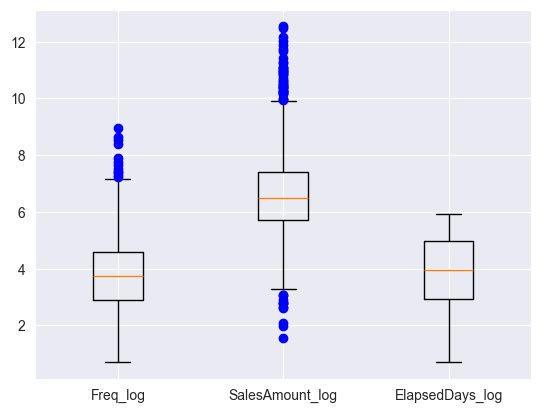

In [16]:
# 기본 데이터 통해서, 데이터 분포도를 1차 검사
# 박스 플롯 그림으로 , 조사. 
# 데이터가 특정 부분에 치우처 진 정도를 알아보기. 
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, ax = plt.subplots()
ax.boxplot([customer_df["Freq_log"], customer_df["SalesAmount_log"], customer_df["ElapsedDays_log"]],sym="bo")
plt.xticks([1,2,3], ["Freq_log", "SalesAmount_log","ElapsedDays_log"])
plt.show()

# X축: Freq_log, SalesAmount_log, ElapsedDays_log (로그 변환된 변수)
# Y축: 각 변수의 값 분포
# 박스(사각형): 데이터의 중앙값(IQR, Interquartile Range)과 사분위수를 나타냄
# 수염(Whisker): 데이터의 최대/최소값을 나타내며, 이상치가 아닌 값까지 확장
# 점(Outliers): 박스플롯의 수염을 벗어난 값 (이상치)

# ✔️ Freq_log (구매 빈도 로그 변환)
# 중앙값(주황선)이 박스의 가운데에 위치 → 데이터 분포가 비교적 대칭
# 위쪽(상위) 이상치 다수 존재 → 일부 고객이 높은 빈도로 구매
# 전반적으로 균형 잡힌 분포이나 이상치는 고려해야 함
# ✔️ SalesAmount_log (구매 금액 로그 변환)
# 중앙값이 약간 아래쪽 → 데이터가 오른쪽으로 치우칠 가능성 있음
# 상위 이상치 다수 존재 → 일부 고객이 매우 높은 금액을 소비
# 하위 이상치는 상대적으로 적음
# ✔️ ElapsedDays_log (마지막 구매 후 경과일 로그 변환)
# 중앙값이 박스 중심에 위치 → 대체로 균형적인 분포
# 다른 변수보다 이상치가 적음
# 극단적인 구매 경과일을 가진 고객이 상대적으로 적음

In [17]:
# 데이터 분포도를 스케일링 - 로그함수 이용해서, 기준값의 분포를 적절히 조절하고, 
# k 평균 군집합을 불러와서 
# 모델을 학습하고, 
# 예측값, 실제값 비교해서, 필요한 인사이트 도출하기. 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = customer_df[["Freq_log", "SalesAmount_log", "ElapsedDays_log"]].values

In [18]:
# 정규화 작업 하기. 
from  sklearn.preprocessing import StandardScaler
# StandardScaler 모듈 이용해서, 정규화, 학습 시키기 
X_features_scaled = StandardScaler().fit_transform(X_features)

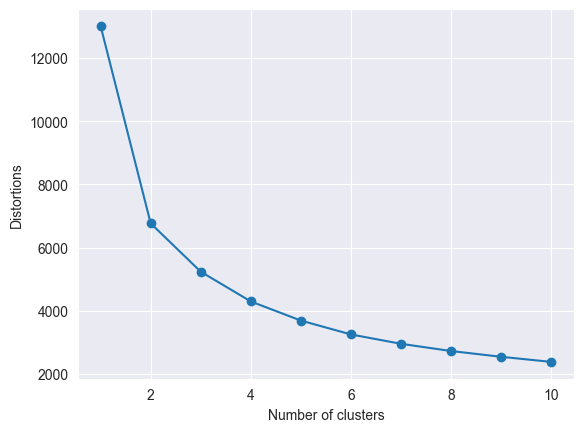

In [19]:
# 클러스터, (군, 집합,..) 분류 기준, 몇개의 그룹으로 나누는게 최적인지를 판단하기 어려워서 
# 엘보 방법을 이용해서, k값 후보군을 구해서, 임시로 몇개를 선택 하기. 
# 그래프를 이용해서, 어느 부분에서 그래프가 꺽이는지( 팔꿈치 모양처럼 생김. )

# 선이 꺽이는 부분을 왜곡 : distortions -> 몇개의 그룹으로 나누는 기준이 될 후보들. 

distortions = []

for i in range (1,11):
  # 모델 생성하는 방법, 1 ~ 10개까지 구성해서 , 테스트 해볼 예정. 
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(X_features_scaled)
  distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

In [20]:
# 엘보 방법으로, 몇개의 그룹으로 나눌지 여부를 후보군을 그래프로 판단해서
# 임의로, k = 3, 4, 5라고 가정해보고, 다시 학습을 시켜보자. 

# 그룹을 3개의 그룹으로해서, 모델 생성 
kmeans = KMeans(n_clusters=3, random_state=0)
# 생성된 모델을 기준으로, x 값 을이용해서, 예측값을 구하고, 
Y_labels = kmeans.fit_predict(X_features_scaled)

# 구한 예측값을 기존의 데이터프레임에 , 새컬럼으로 추가하기. 
customer_df["ClusterLabel"] = Y_labels
customer_df.head()


,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


In [21]:
# k = 3 일 때, 판단 기준은 엘보 방법으로 판단을 했고, 
# 확인차, k = 4,5,6 확인 해볼 예정.
# 최적의 클러스터 수라고 가정하에, 그래프를 그려서 , 데이터가 얼마나 분포가 고르게 나타나는지 확인. 
# 그래프 그리는 함수는 최대한, 기존 코드를 재사용. 

# 각 클러스터 나누는 기준의 비중을 그래프로 확인해서, 값 찾기

from matplotlib import cm 

# 실루엣 계수를 활용하여 각 군집이 얼마나 명확하게 분리되었는지 평가하고,
# 이를 그래프로 나타냅니다.
def silhouetteViz(n_clusters, X_features):
  #   K-Means 모델 생성
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  # K-Means를 훈련하고 각 데이터의 군집 라벨을 예측
  Y_labels = kmeans.fit_predict(X_features)

  # 실루엣 값을 비교하기, 응집도, 분리도의차를 해당 최대값으로 나눈 비율 
  # -1과 1사이의 값이었고, 결과적으로 1에 가까울수록 성능이 좋다.
  # 군집이 잘 분리되고 응집도가 높음

#euclidean , 분리도에서, 거리 측정을 유클리드 거리의 계산을 이용했다. 
  silhouette_values = silhouette_samples(X_features,Y_labels,metric="euclidean")

  # 이 값을 업데이트하면서 막대그래프의 Y축 위치를 조정
  y_ax_lower, y_ax_upper = 0, 0 
  y_ticks = []

  for c in range(n_clusters):
    # 특정 군집의 실루엣 계수 추출
    c_silhouettes = silhouette_values[Y_labels == c]
    # 실루엣 계수 정렬
    c_silhouettes.sort()
    # 현재 군집의 데이터 개수 누적
    y_ax_upper += len(c_silhouettes)
    # 색상 지정
    # cm.jet() 함수는 Matplotlib의 컬러맵(Colormap) 중 하나로,
    # 특정 숫자를 입력받아 색상을 반환합니다.
    #     float(c)/n_clusters 값	색상
    # 0.0	파란색 (Blue)
    # 0.25	청록색 (Cyan)
    # 0.5	초록색 (Green)
    # 0.75	노란색 (Yellow)
    # 1.0	빨간색 (Red)
    color = cm.jet(float(c)/ n_clusters)
    # 수평 막대 그래프(barh)를 그려 군집별 실루엣 계수를 시각화
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor = "none", color = color)
    # Y축 눈금 위치 추가 (군집 중심)
    y_ticks.append((y_ax_lower+y_ax_upper)/ 2.)
    y_ax_lower += len(c_silhouettes)

  # 전체 실루엣 계수 평균
  silhouette_avg = np.mean(silhouette_values)
  # 빨간 점선 추가 (평균 실루엣 점수)
  plt.axvline(silhouette_avg, color="red", linestyle ="--")
  plt.title('Number of Cluster : '+str(n_clusters) + '\n' + 'silhouette_Score: ' + str(round(silhouette_avg,3) ))
  plt.yticks([0, 0.2, 0.4, 0.6, 0.8 , 1])
  plt.ylabel("Cluster")
  plt.xlabel("silhouette coefficient")
  plt.tight_layout()
  plt.show()


In [22]:
# 클러스터의 데이터 분포를 확인하기 위한 스캐터 차트 확인. 
# n_clusters: 클러스터 개수(K 값)
# X_features: 입력 데이터 (2차원 또는 주성분 분석(PCA) 후 차원 축소된 데이터)
def clusterScatter(n_clusters, X_features):
  # 군집별 색상 지정
  c_colors = []
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  Y_labels = kmeans.fit_predict(X_features)

  for i in range(n_clusters):
    c_color = cm.jet(float(i) / n_clusters)
    c_colors.append(c_color)

    # 클러스터의 데이터 분포를 동그라미로 시각화
    # X_features[Y_labels == i,0]: X축 값 (클러스터 i에 속하는 데이터)
    # X_features[Y_labels == i,1]: Y축 값
    # color=c_color: 각 군집마다 다른 색상 적용
    # edgecolor="black": 마커의 외곽선을 검정색으로 설정
    # s=50: 마커 크기
    # label='Cluster ' + str(i): 군집별 범례(Label) 추가
    plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker="o", color = c_color, edgecolor = "black", s = 50 , label = 'cluster ' + str(i))

  # 각 클러스터 중심점을 삼각형으로 표시.
  # kmeans.cluster_centers_[i,0]: 클러스터 i의 중심점(X 좌표)
  # kmeans.cluster_centers_[i,1]: 클러스터 i의 중심점(Y 좌표)
  for i in range(n_clusters):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker="^", color = c_colors[i], edgecolor="w", s = 200 )
    
  plt.legend()
  # 격자 추가하여 가독성 향상
  plt.grid()
  # 레이아웃 자동 조정 (그래프가 겹치는 것 방지)
  plt.tight_layout()
  plt.show()

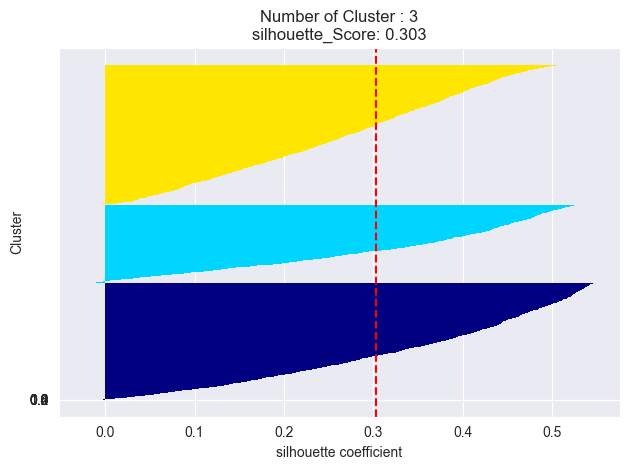

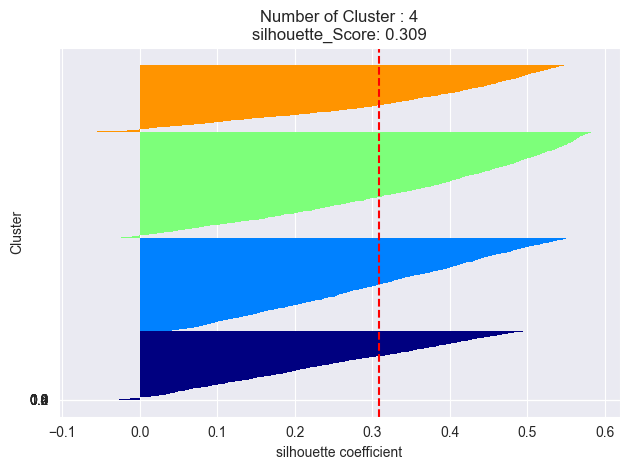

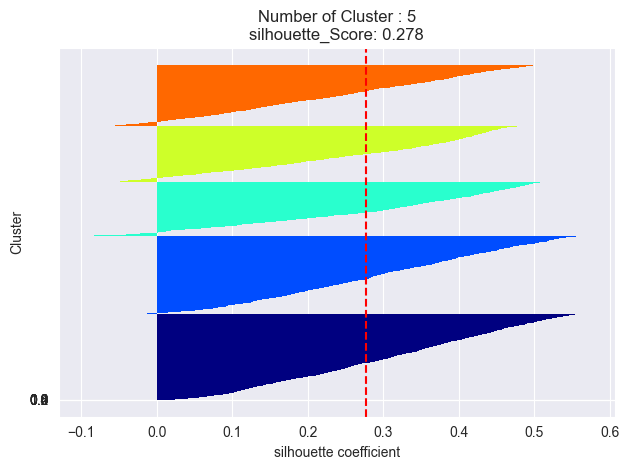

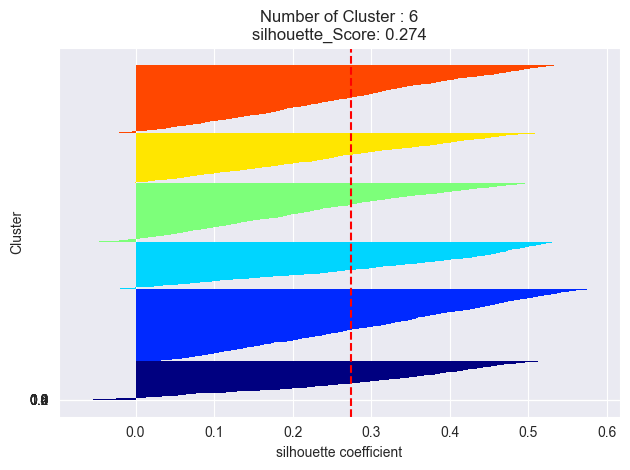

In [23]:
# 그래프 그리기.
# 실루엣 계수, 비중  비교하기. 
silhouetteViz(3,X_features_scaled)
silhouetteViz(4,X_features_scaled)
silhouetteViz(5,X_features_scaled)
silhouetteViz(6,X_features_scaled)
# 막대그래프: 각 군집의 샘플별 실루엣 계수
# 긴 막대 → 군집 내 데이터가 응집되어 있음 (좋음)
# 짧고 분산된 막대 → 군집이 모호함
# 빨간 점선: 전체 데이터의 평균 실루엣 계수
# 실루엣 평균이 0.5 이상이면 좋은 군집화
# 0.25~0.5면 보통
# 0.25 이하이면 군집 품질이 낮음




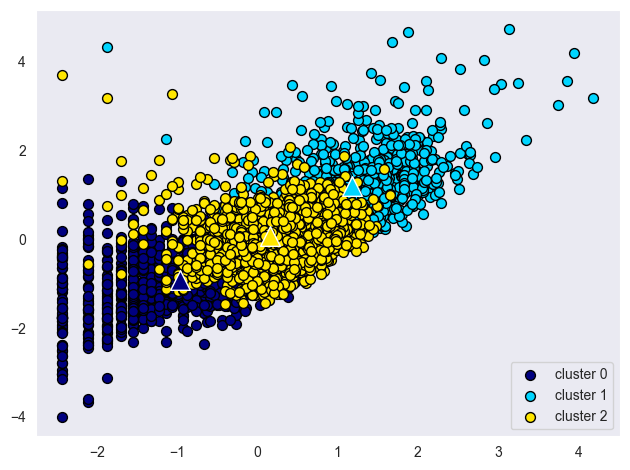

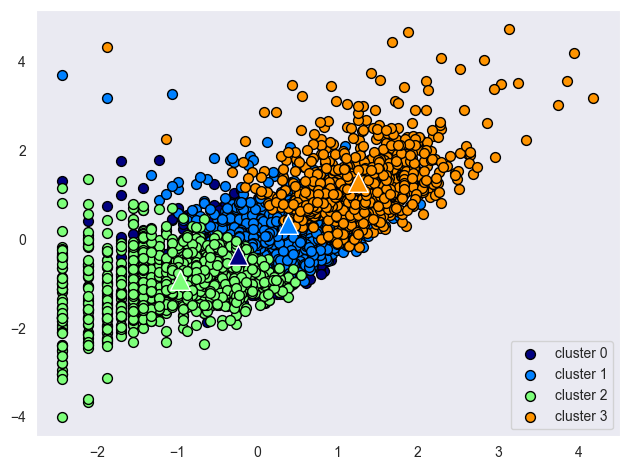

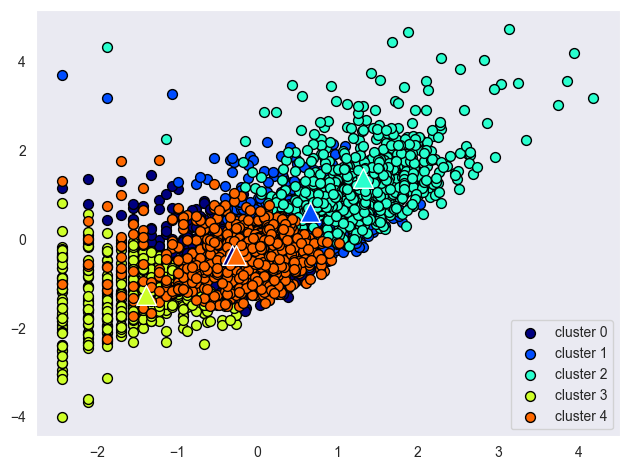

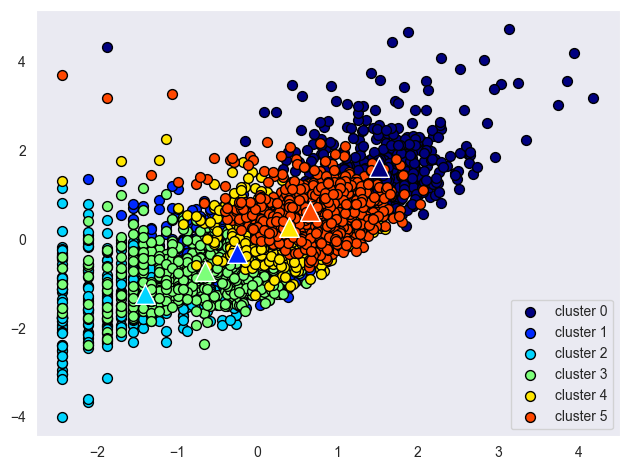

In [24]:
# 데이터 분포 그리기 
clusterScatter(3,X_features_scaled)
clusterScatter(4,X_features_scaled)
clusterScatter(5,X_features_scaled)
clusterScatter(6,X_features_scaled)

In [25]:
# 결론, 실루엣 계수와, 데이터 분포도를 확인해서, 
# 대략적으로, k = 4 개일때, 4개의 그룹으로 나누었을 때, 가장 데이터가 고르게 분포가 되어있드라.
# 그래서, ㅏ = 4 일 때 기준으로 모델을 학습해서, 원하는 결과를 도출 해보자. 

best_cluster = 4 
# 최적 클러스터 값을 이용해서, 모델생성
kmeans = KMeans(n_clusters= best_cluster, random_state=0)
# 모델 이용해서, 예측 값 구함. 
Y_labels = kmeans.fit_predict(X_features_scaled)


In [26]:
customer_df["ClusterLabel"] = Y_labels
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2


In [27]:
# csv 파일로 결과값 저장. 
customer_df.to_csv("./Online_Retail_Result.csv")

# 모델이 완성이 됨. 



In [28]:
# 추가 분석 -> 어떤 인사이트를 도출 ? 
# 소비자 군집, 소비자 클러스터를 이용해, 타깃 마케팅 전략을 세우기. 
# ClusterLabel 기준으로 그룹 만들기. 

customer_df.groupby("ClusterLabel")["CustomerID"].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [29]:
# 전체 고객 약 4,338 명중에서
# 891 명이 0 번 그룹,
# 1207 명이 1번 그룹 
# 1368 명 2번 그룹
# 872 명 3번 그룹


customer_cluster_df = customer_df.drop(["Freq_log", "SalesAmount_log","ElapsedDays_log"], axis=1 , inplace=False)

In [30]:
# 각 고객 클러스터 별 , 1회당 평균 구매액. 
customer_cluster_df["SalesAmountAvg"] = customer_cluster_df["SalesAmount"] / customer_cluster_df["Freq"]
customer_cluster_df.head() 

,CustomerID,Freq,SalesAmount,ElapsedDays,ClusterLabel,SalesAmountAvg
0,12346,1,77183.60,326,1,77183.600000
1,12347,182,4310.00,3,3,23.681319
2,12348,31,1797.24,76,1,57.975484
3,12349,73,1757.55,19,1,24.076027
4,12350,17,334.40,311,2,19.670588


In [31]:
# 컬럼 다듬기 
customer_cluster_df.drop(["CustomerID"], axis=1, inplace=False).groupby("ClusterLabel").mean()

,Freq,SalesAmount,ElapsedDays,SalesAmountAvg
ClusterLabel,,,,
0,37.811448,603.494053,20.888889,32.256335
1,79.195526,1506.813034,96.000829,102.998219
2,15.052632,298.748151,188.111842,43.338802
3,278.464450,7020.739553,13.612385,96.665836


In [33]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Adjusted Rand Index (ARI) 계산
ari_score = adjusted_rand_score(customer_cluster_df['species'], customer_cluster_df['ClusterLabel'])

# Normalized Mutual Information (NMI) 계산
nmi_score = normalized_mutual_info_score(df['species'], df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")


KeyError: 'species'